In [1]:
# import library
import pandas
import numpy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [2]:
# assign directory
dir_name = './datasets/'
file_name = 'preprocessed.onuni.FinanceAccounting.csv'

# load dataframe
df = pandas.read_csv(dir_name + file_name, encoding="utf-8", nrows=None, index_col=0)

In [3]:
# view the inputted dataframe
df.head()

,id,title,is_paid,num_subscribers,average_rating,rating,num_reviews,num_lectures,num_tests,time_created,time_published,discount,price,discount_percent,rating_deviation
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,6.161458,117.0,5.266204,0.01855
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,6.161458,117.0,5.266204,0.01059
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,6.161458,117.0,5.266204,-0.00165
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,6.161458,117.0,5.266204,-0.00635
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,6.161458,117.0,5.266204,0.00093


In [4]:
# deep copy data for training preditive model
learning_df = df.copy(deep=True)

In [5]:
# drop unused columns for training predictive model
drop_col = ['id', 'title','discount_percent', 'rating_deviation']
learning_df.drop(columns=drop_col, inplace=True)

In [6]:
# convert other datatypes to numeric type
learning_df['is_paid'] = learning_df['is_paid'].astype('int')
learning_df['time_created'] = pandas.to_datetime(learning_df['time_created']).astype('int64') // 86400000000000
learning_df['time_published'] = pandas.to_datetime(learning_df['time_published']).astype('int64') // 86400000000000

In [7]:
learning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13608 entries, 0 to 13607
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   is_paid          13608 non-null  int32  
 1   num_subscribers  13608 non-null  int64  
 2   average_rating   13608 non-null  float64
 3   rating           13608 non-null  float64
 4   num_reviews      13608 non-null  int64  
 5   num_lectures     13608 non-null  int64  
 6   num_tests        13608 non-null  int64  
 7   time_created     13608 non-null  int64  
 8   time_published   13608 non-null  int64  
 9   discount         13608 non-null  float64
 10  price            13608 non-null  float64
dtypes: float64(4), int32(1), int64(6)
memory usage: 1.2 MB


In [8]:
learning_df

,is_paid,num_subscribers,average_rating,rating,num_reviews,num_lectures,num_tests,time_created,time_published,discount,price
0,1,295509,4.66019,4.67874,78006,84,0,16845,16897,6.161458,117.0
1,1,209070,4.58956,4.60015,54581,78,0,17035,17036,6.161458,117.0
2,1,155282,4.59491,4.59326,52653,292,2,17435,17484,6.161458,117.0
3,1,245860,4.54407,4.53772,46447,338,0,16731,16821,6.161458,117.0
4,1,374836,4.47080,4.47173,41630,83,0,16720,16811,6.161458,117.0
...,...,...,...,...,...,...,...,...,...,...,...
13603,0,47,0.00000,0.00000,0,6,0,18367,18375,0.000000,0.0
13604,0,19,0.00000,0.00000,0,5,0,18506,18508,0.000000,0.0
13605,0,47,0.00000,0.00000,0,5,0,18470,18474,0.000000,0.0
13606,0,48,0.00000,0.00000,0,13,0,18420,18458,0.000000,0.0


In [9]:
# the model try to preditive rating of courses
# split training and tesing data for model
X = learning_df.drop('rating', axis=1)
Y = learning_df['rating']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=32)

In [10]:
# Create model and training model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [11]:
# use trained model to predicting
Y_predict = model.predict(X_test)

In [12]:
# visualize preditive results
evaluate_df = pandas.DataFrame(Y_test)
evaluate_df['perdict_rating'] = Y_predict
evaluate_df['loss'] = evaluate_df['perdict_rating'] - evaluate_df['rating']
evaluate_df[['id','title']] = df[['id','title']]
evaluate_df.reset_index(drop=True, inplace=True)
evaluate_df.head()

,rating,perdict_rating,loss,id,title
0,4.09372,4.043606,-0.050114,2477306,Problem Analysis Tools and Techniques
1,4.23117,4.182555,-0.048615,590728,Learn Data Visualization with Tableau 9.1
2,3.80626,3.883099,0.076839,530246,Learn To Invest In Index Funds and ETFs In 7 E...
3,4.69073,4.637011,-0.053719,1905576,How to Win US Federal Government Contracts
4,4.49064,4.455170,-0.035470,1203914,Google Analytics Reports and Dashboards with D...


<AxesSubplot:ylabel='Frequency'>

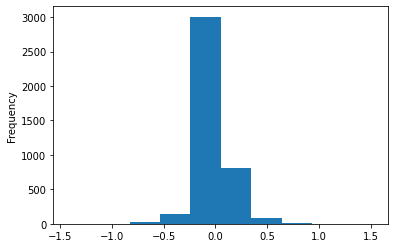

In [13]:
evaluate_df['loss'].plot(kind='hist')

<AxesSubplot:>

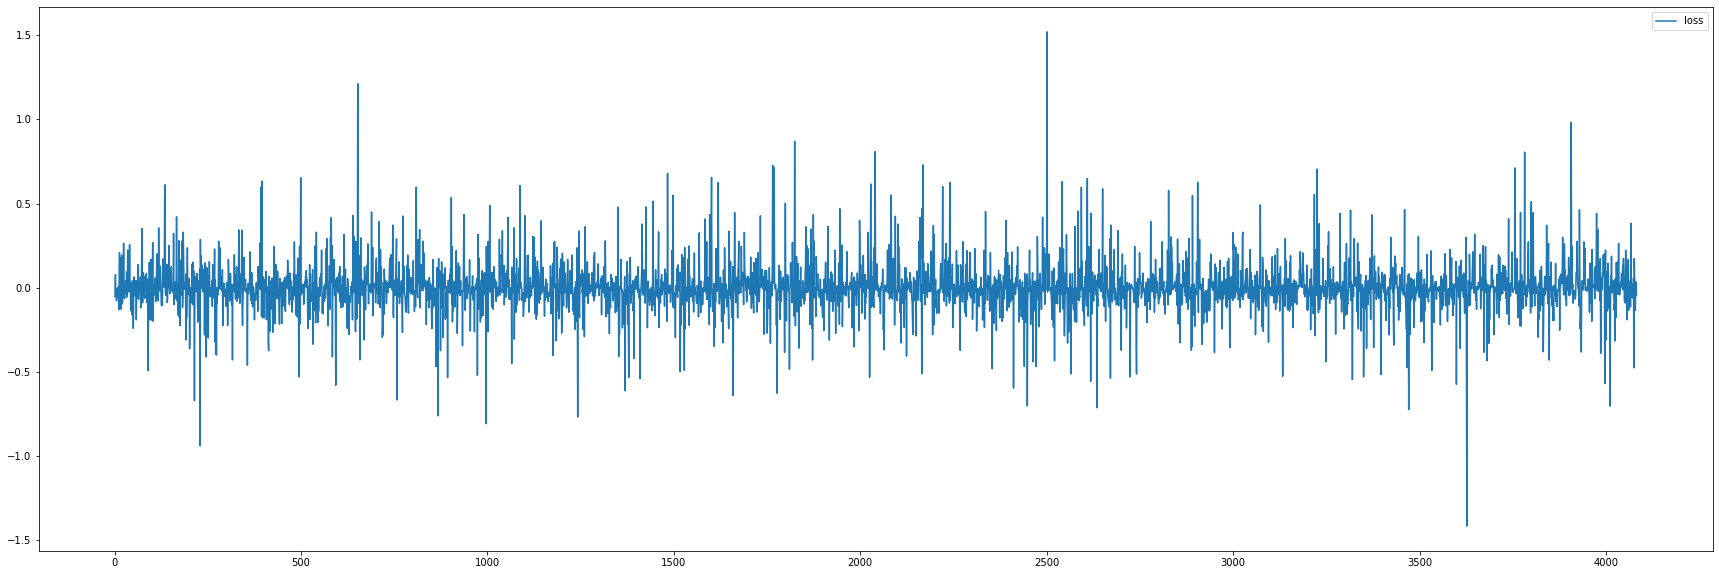

In [14]:
evaluate_df.plot(y='loss',figsize=(30,10))

In [15]:
# show error
mse = mean_squared_error(Y_test, Y_predict)
print('Mean Squared Error:          ', mse)
print('Root Mean Squared Error:     ', numpy.sqrt(mse))

Mean Squared Error:           0.02285850607309625
Root Mean Squared Error:      0.1511902975494666


In [16]:
evaluate_df['loss'].describe()

count    4083.000000
mean       -0.000538
std         0.151208
min        -1.416227
25%        -0.050349
50%        -0.005309
75%         0.042132
max         1.519705
Name: loss, dtype: float64